## Setting up the environment

Including all Necessary Import statements

In [1]:
!pip install imblearn
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Setting Custom NLTK Data Path:
This snippet configures a custom path for NLTK data, allowing the code to locate necessary datasets and resources in a specified directory on the user's computer.

Specify path:
nltk_data_path: Specifies the path to the folder where NLTK data is stored `C:\Users\samhi\AppData\Roaming\nltk_data`.

Adding custom path to NLTK:
`nltk.data.path.append(nltk_data_path)`: Adds the specified path to the list of directories NLTK searches for data.

Verifying path:
`print(nltk.data.path)`: Prints the list of paths, confirming the addition of the custom path to NLTK’s search directories.

In [ ]:
""" run locally
nltk_data_path = r'C:\Users\samhi\AppData\Roaming\nltk_data'
nltk.data.path.append(nltk_data_path)

# Verify the path
print(nltk.data.path)
print(f"Punkt exists: {os.path.exists(os.path.join(nltk_data_path, 'tokenizers', 'punkt'))}")
print(f"Stopwords exists: {os.path.exists(os.path.join(nltk_data_path, 'corpora', 'stopwords'))}")
"""


['C:\\Users\\samhi/nltk_data', 'c:\\Users\\samhi\\anaconda3\\envs\\sentiment_env\\nltk_data', 'c:\\Users\\samhi\\anaconda3\\envs\\sentiment_env\\share\\nltk_data', 'c:\\Users\\samhi\\anaconda3\\envs\\sentiment_env\\lib\\nltk_data', 'C:\\Users\\samhi\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\samhi\\AppData\\Roaming\\nltk_data']
Punkt exists: True
Stopwords exists: True


In [18]:
file_path = r"/content/TIL Dataset(Cleaned).csv"
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

File exists


### Loading the dataset

In [3]:
# Loading the dataset
df = pd.read_csv(file_path)
print(df.info())
print(df.head())
print(df['target'].value_counts()) # Checking class distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871909 entries, 0 to 871908
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        871909 non-null  object
 1   target      871909 non-null  object
 2   Word Count  871909 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 20.0+ MB
None
                                                text              target  \
0   python courses python courses, python exercis...  academic interests   
1  the learning point open digital education. a r...  academic interests   
2   equl offers enzyme assay kits, reagent mixtur...  academic interests   
3  tech news, latest technology, mobiles, laptops...  academic interests   
4  the best it certification materials in usa | k...  academic interests   

   Word Count  
0         125  
1         147  
2         353  
3         143  
4         364  
target
academic interests                           73134
books and literatu

Downloading all NLTK related Packages

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

## Data Preprocessing

Text Preprocessing Function for NLP

It defines a function, preprocess_text, which cleans and processes raw text data to prepare it for machine learning or NLP tasks. The function removes HTML tags, special characters, and stopwords and then tokenizes and normalizes the text.

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from gensim.models import KeyedVectors


In [6]:
def preprocess_text(text, remove_stopwords=False):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Keep alphanumeric characters and spaces
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [7]:
# Display a sample of cleaned text
print(df['cleaned_text'].head())

0    python course python course python exercise py...
1    learning point open digital education reposito...
2    equl offer enzyme assay kit reagent mixture en...
3    tech news latest technology mobile laptop ndtv...
4    best certification material usa killtest leadi...
Name: cleaned_text, dtype: object


## Feature Extraction - Word2Vec

This section handles the tokenization of the cleaned text and trains a Word2Vec model to create word embeddings. It also prepares the sequences for input into the CNN.

In [8]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [9]:
# Tokenize the cleaned text
tokenized_texts = [text.split() for text in df['cleaned_text']]

# Training Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# word-to-index dictionary
word_to_index = {word: i+1 for i, word in enumerate(word2vec_model.wv.index_to_key)}

# texts to sequences of word indices
max_length = 1000
sequences = [[word_to_index.get(word, 0) for word in text.split()[:max_length]] for text in df['cleaned_text']]
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['target'])
categorical_labels = to_categorical(encoded_labels)

## Handling Class Imbalance


The code splits the dataset into training, validation, and test sets while maintaining the class distribution to handle imbalances.

It calculates class weights using `compute_class_weight` to address the imbalance by assigning higher weights to underrepresented classes, ensuring the model learns effectively across all classes.

Data is split into training (45%), validation (35%), and test (20%) sets.

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, stratify=encoded_labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Calculate class weights for imbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_labels), y=encoded_labels)
class_weights = dict(enumerate(class_weights))

''' Verifying the split sizes - ran locally to check
# print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/X_resampled.shape[0]:.2%})")
# print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/X_resampled.shape[0]:.2%})")
# print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/X_resampled.shape[0]:.2%})")
''''

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pickle

# Save data
with open('/content/drive/MyDrive/preprocessed_datav2.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), f)

# Load data
with open('/content/drive/MyDrive/preprocessed_datav2.pkl', 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

Mounted at /content/drive


The total number of samples after resampling is 1,901,484 (855,667 + 665,520 + 380,297).

## Building CNN Model

This section builds a CNN model using the embeddings from Word2Vec and trains it on the balanced dataset. It evaluates the model's performance and visualizes training history.

This code imports necessary libraries for building and running a deep learning model with TensorFlow. It checks the versions of TensorFlow and NumPy to ensure compatibility and verifies the current memory usage using the `psutil` library, which can be useful for debugging or monitoring resources during development, especially on local machines.

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

print(f"TensorFlow version: {tf.__version__}")
print(f"Numpy version: {np.__version__}")

# Checking memory usage (for debugging, especially locally)
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

TensorFlow version: 2.15.0
Numpy version: 1.26.4
Memory usage: 9.3%


This code initializes a TPU for distributed training in TensorFlow. It uses `TPUClusterResolver` to detect TPUs and connects to them, then initializes the TPU system and sets up a TPU strategy. If an error occurs, it prints an error message.

In [14]:
# TPU Initialization
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detecting TPUs
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print("TPU initialized successfully.")
except Exception as e:
    print(f"Error initializing TPU: {e}")

TPU initialized successfully.


This code creates an embedding matrix for a neural network using pre-trained word vectors from `word2vec_model`.

It initializes the matrix with zeros and populates it by mapping each word in `word_to_index` to its corresponding vector from `word2vec_model`.

The embedding dimension is then set based on the shape of the embedding matrix.

In [15]:
embedding_dim = 100
input_dim = len(word_to_index) + 1
embedding_matrix = np.zeros((input_dim, embedding_dim))

for word, i in word_to_index.items():
    embedding_vector = word2vec_model.wv.get_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_dim = embedding_matrix.shape[1]  # Embedding dimension from the embedding matrix

## Model Summary

Later on, a CNN model is setup for text classification using a TPU.

In [16]:
with strategy.scope():  # Ensuring the model runs on TPU
    cnn_model = Sequential([
        Embedding(
            input_dim=input_dim,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=max_length,
            trainable=False  # Freeze embeddings
        ),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=len(label_encoder.classes_), activation='softmax')
    ])

    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         296395500 
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                        

The CNN model trains using the training data (`X_train`, `y_train`) and validates it on the validation set (`X_val`, `y_val`).

It runs for 10 epochs with a batch size of 128 and uses `class_weights` to handle class imbalance during training.

In [17]:
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    class_weight=class_weights  # Addressing class imbalance with class weights
)

Epoch 1/10
4360/4360 [==============================] - 116s 26ms/step - loss: 1.7852 - accuracy: 0.5016 - val_loss: 0.9721 - val_accuracy: 0.7351
Epoch 2/10
4360/4360 [==============================] - 107s 25ms/step - loss: 1.2976 - accuracy: 0.6552 - val_loss: 0.9095 - val_accuracy: 0.7545
Epoch 3/10
4360/4360 [==============================] - 108s 25ms/step - loss: 1.2108 - accuracy: 0.6821 - val_loss: 0.8551 - val_accuracy: 0.7677
Epoch 4/10
4360/4360 [==============================] - 107s 25ms/step - loss: 1.1599 - accuracy: 0.6974 - val_loss: 0.8400 - val_accuracy: 0.7702
Epoch 5/10
4360/4360 [==============================] - 108s 25ms/step - loss: 1.1275 - accuracy: 0.7066 - val_loss: 0.8327 - val_accuracy: 0.7726
Epoch 6/10
4360/4360 [==============================] - 108s 25ms/step - loss: 1.1030 - accuracy: 0.7127 - val_loss: 0.8292 - val_accuracy: 0.7728
Epoch 7/10
4360/4360 [==============================] - 107s 25ms/step - loss: 1.0860 - accuracy: 0.7174 - val_loss: 0

### Test Accuracy


The trained CNN model evalutes on the test set (X_test, y_test) and calculates the test loss and accuracy.

In [19]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

5450/5450 [==============================] - 107s 19ms/step - loss: 0.8193 - accuracy: 0.7768
Test accuracy: 0.7768


## **Evaulation**

The code converts one-hot encoded labels to class labels using `np.argmax` and predicts class labels on the validation and test sets using the CNN model.

The predicted probabilities are also converted to class predictions for evaluation.

In [21]:
from sklearn.metrics import classification_report
import numpy as np

# Convert true labels from one-hot encoding to class labels
y_val_labels = np.argmax(y_val, axis=1)  # Convert validation true labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert test true labels

# Get predictions for validation and test sets
val_preds = cnn_model.predict(X_val)  # Predict on validation set
test_preds = cnn_model.predict(X_test)  # Predict on test set

# Convert probabilities to class predictions
y_val_pred = np.argmax(val_preds, axis=1)
y_test_pred = np.argmax(test_preds, axis=1)

5450/5450 [==============================] - 98s 18ms/step


The code generates and prints classification reports for both the validation and test sets, providing detailed performance metrics like precision, recall, and F1-score for each class.

In [30]:
# Classification report on validation and test sets
val_report = classification_report(y_val_labels, y_val_pred, output_dict=True)
test_report = classification_report(y_test_labels, y_test_pred, output_dict=True)

print("Validation Set Classification Report:")
print(classification_report(y_val_labels, y_val_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test_labels, y_test_pred))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     11702
           1       0.77      0.75      0.76      5272
           2       0.93      0.92      0.92      5601
           3       0.91      0.88      0.90      8087
           4       0.68      0.67      0.68      5608
           5       0.98      0.98      0.98      6097
           6       0.65      0.80      0.71      5790
           7       0.75      0.76      0.76      4687
           8       0.64      0.64      0.64      3794
           9       0.62      0.73      0.67      6189
          10       0.92      0.67      0.78      4791
          11       0.78      0.75      0.77      4603
          12       0.69      0.67      0.68      4356
          13       0.72      0.79      0.76      4126
          14       0.66      0.75      0.70      6040
          15       0.64      0.64      0.64      4226
          16       0.87      0.81      0.84

### Confusion matrix

The confusion matrices are generatesd with heatmaps for both the validation and test sets, showing true versus predicted label counts

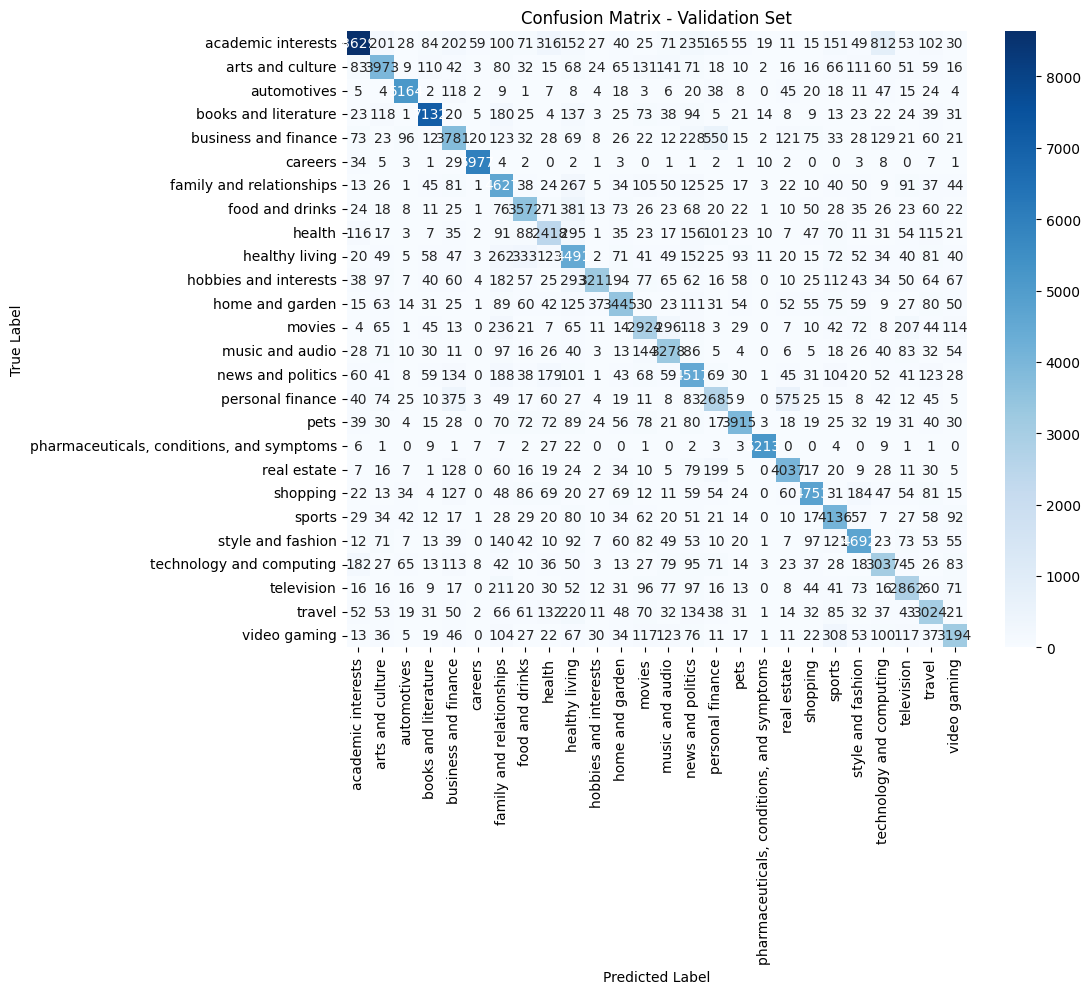

In [25]:
# Confusion matrix and heatmap for the validation set
val_conf_matrix = confusion_matrix(y_val_labels, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Validation Set")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

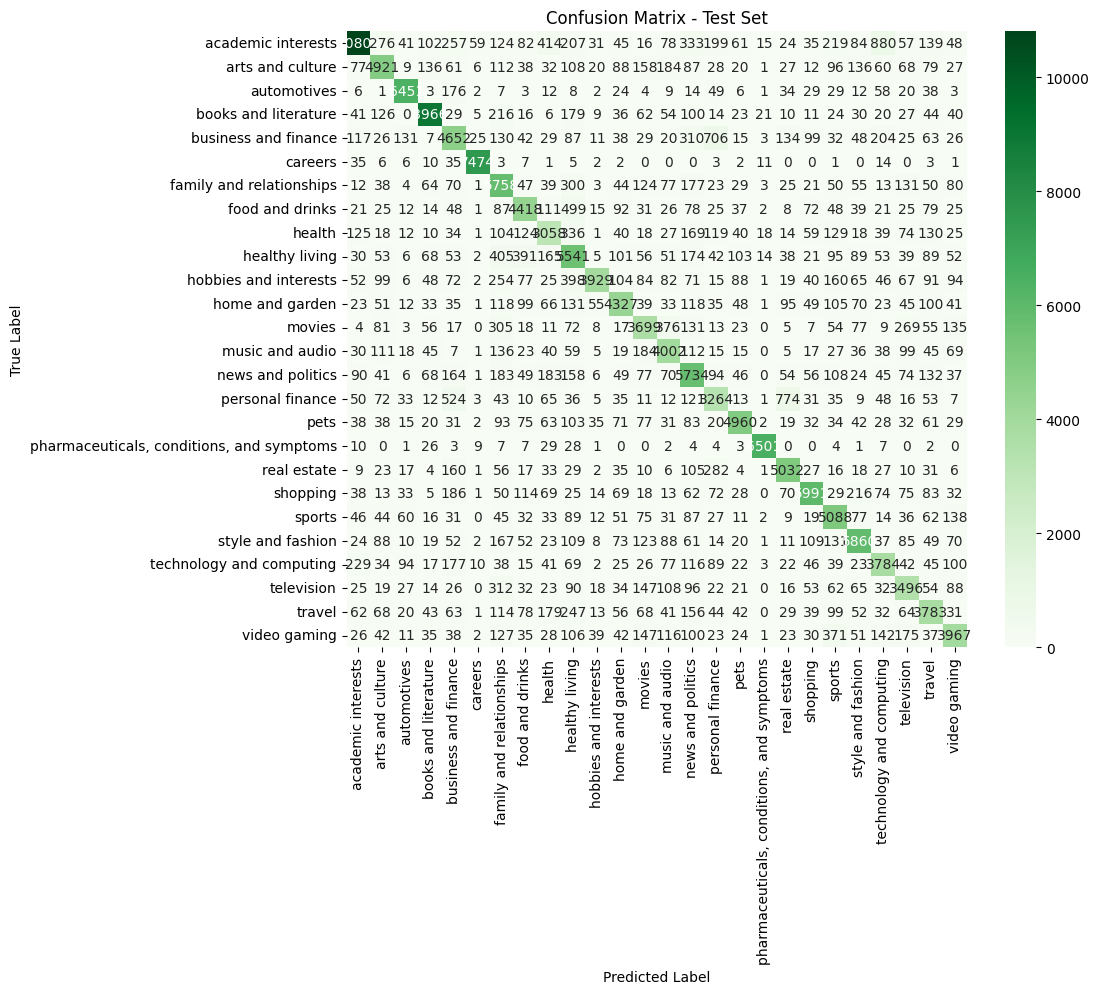

In [26]:
# Confusion matrix and heatmap for the test set
test_conf_matrix = confusion_matrix(y_test_labels, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Test Set")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### **Classification report**

This code generates bar plots comparing precision, recall, and F1-score for each class in both the validation and test sets.

It first extracts and excludes summary metrics from the classification reports, then plots these metrics using distinct bars for each class. The resulting bar plots are customized with labels, titles, and color-coded bars for clarity.

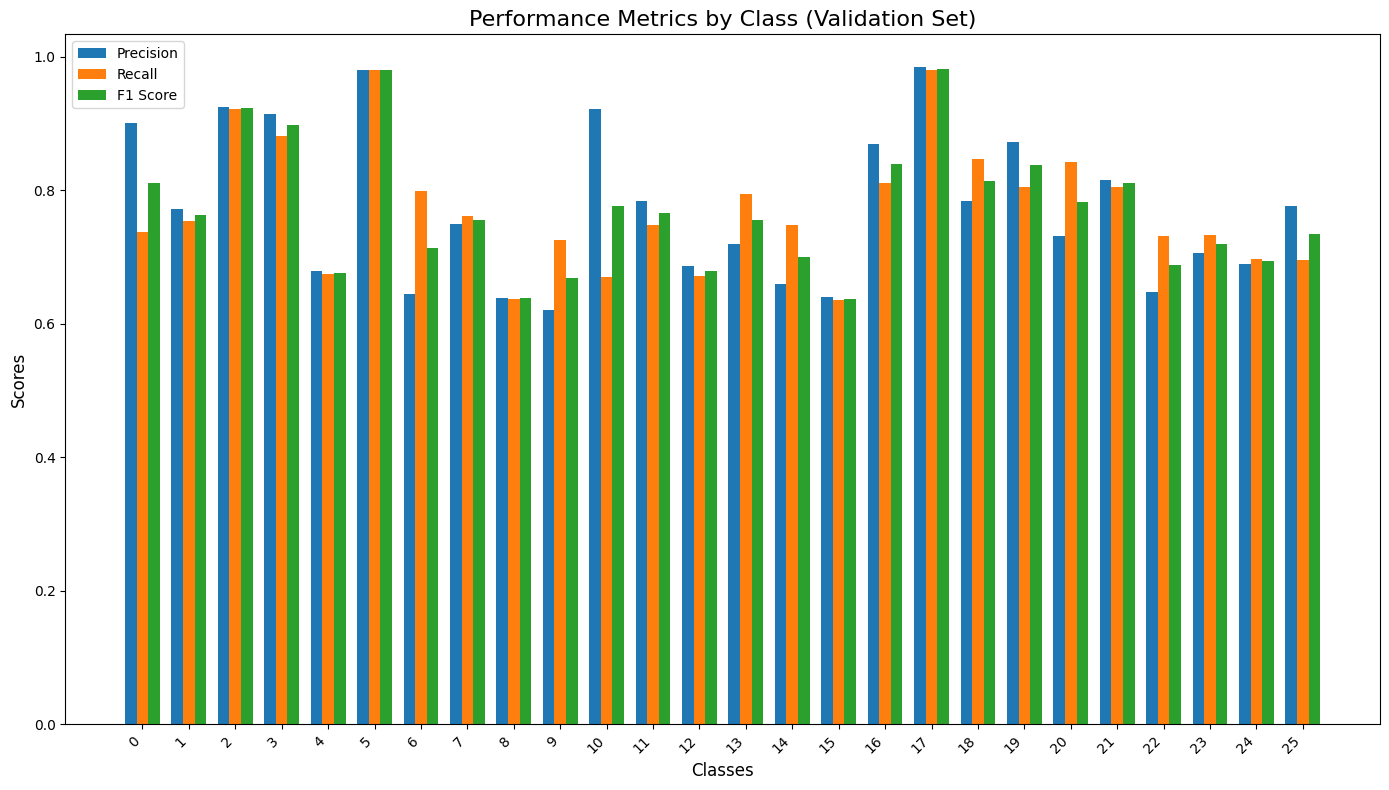

In [37]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


# Classification report on validation sets
# val_report = classification_report(y_val, y_val_pred, output_dict=True, target_names=label_encoder.classes_)
val_report = classification_report(y_val_labels, y_val_pred, output_dict=True)

# Extract class names and metrics while excluding summary metrics
excluded_keys = {'accuracy', 'macro avg', 'weighted avg'}
classes = [cls for cls in val_report.keys() if cls not in excluded_keys]
precision = [val_report[cls]['precision'] for cls in classes]
recall = [val_report[cls]['recall'] for cls in classes]
f1_score = [val_report[cls]['f1-score'] for cls in classes]

# Define the position and width of bars
x = np.arange(len(classes))  # Label locations
width = 0.25  # Width of bars

# Create a bar plot for performance metrics
fig, ax = plt.subplots(figsize=(14, 8))
bars_precision = ax.bar(x - width, precision, width, label='Precision', color='#1f77b4')
bars_recall = ax.bar(x, recall, width, label='Recall', color='#ff7f0e')
bars_f1_score = ax.bar(x + width, f1_score, width, label='F1 Score', color='#2ca02c')

# Add labels, title, and tick labels
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Metrics by Class (Validation Set)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper left', fontsize=10)

# Ensure a tight layout and display the plot
plt.tight_layout()
plt.show()

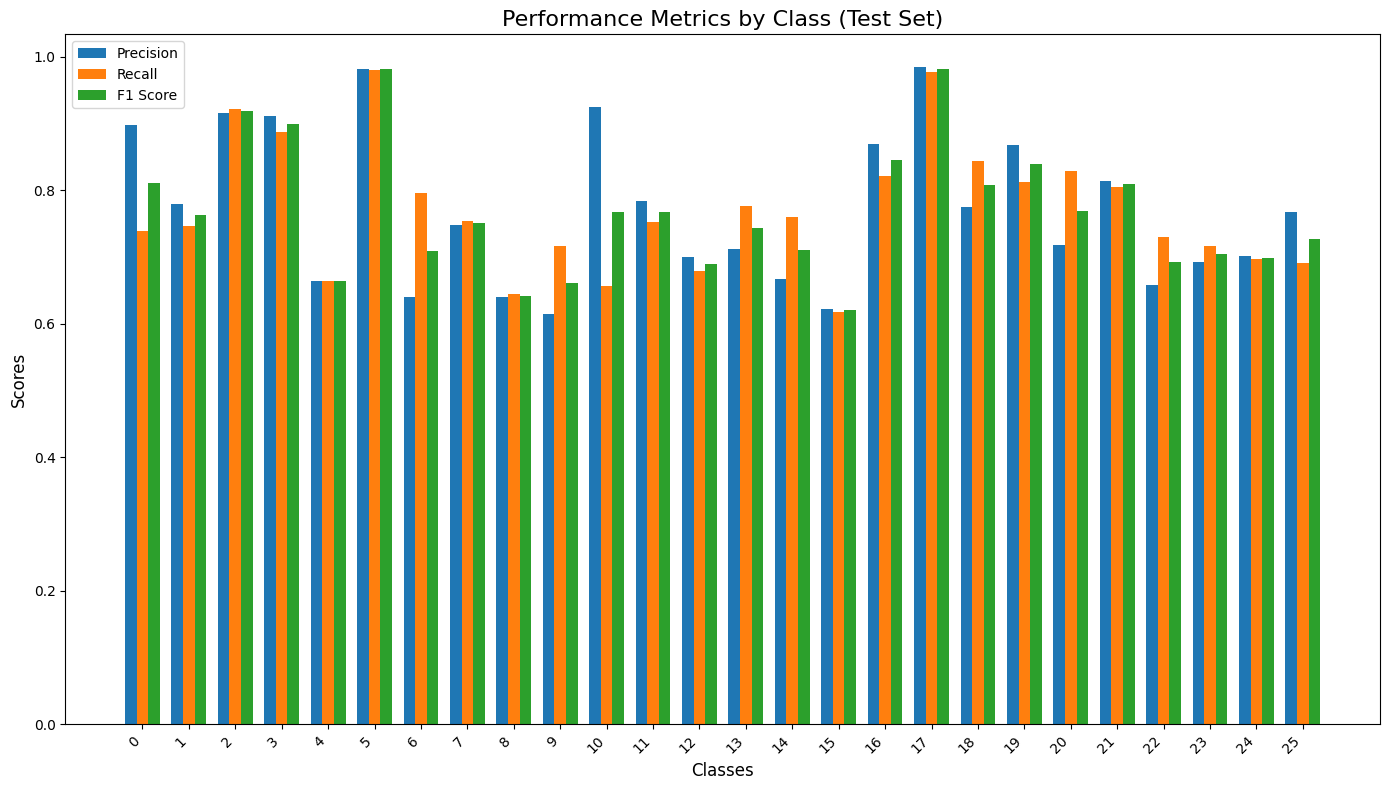

In [40]:
# Classification report on validation and test sets
val_report = classification_report(y_val_labels, y_val_pred, output_dict=True)
test_report = classification_report(y_test_labels, y_test_pred, output_dict=True)

# Extract class names and metrics for the test set, excluding summary metrics
test_classes = [cls for cls in test_report.keys() if cls not in excluded_keys]
test_precision = [test_report[cls]['precision'] for cls in test_classes]
test_recall = [test_report[cls]['recall'] for cls in test_classes]
test_f1_score = [test_report[cls]['f1-score'] for cls in test_classes]

# Create a bar plot for the test set performance metrics
fig, ax = plt.subplots(figsize=(14, 8))
x_test = np.arange(len(test_classes))  # Label locations

bars_test_precision = ax.bar(x_test - width, test_precision, width, label='Precision', color='#1f77b4')
bars_test_recall = ax.bar(x_test, test_recall, width, label='Recall', color='#ff7f0e')
bars_test_f1_score = ax.bar(x_test + width, test_f1_score, width, label='F1 Score', color='#2ca02c')

# Add labels, title, and tick labels for test set
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Metrics by Class (Test Set)', fontsize=16)
ax.set_xticks(x_test)
ax.set_xticklabels(test_classes, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper left', fontsize=10)

# Display the plot for the test set
plt.tight_layout()
plt.show()
